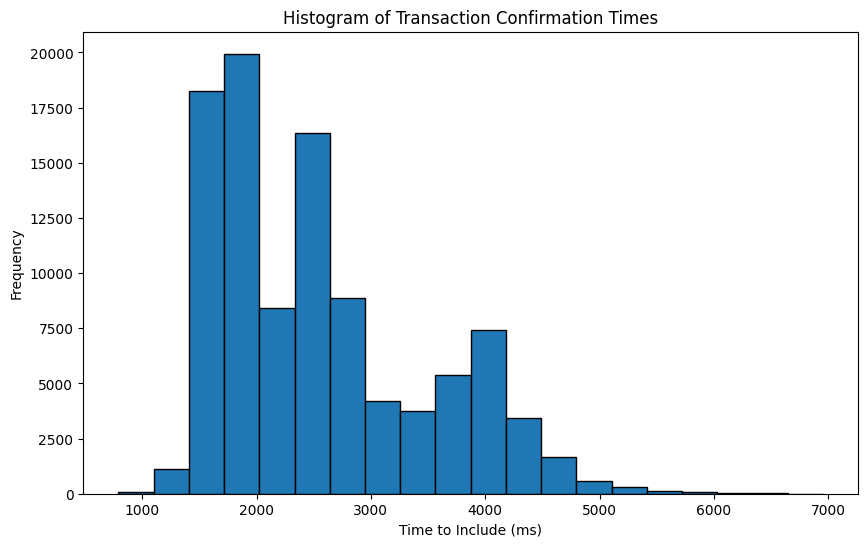

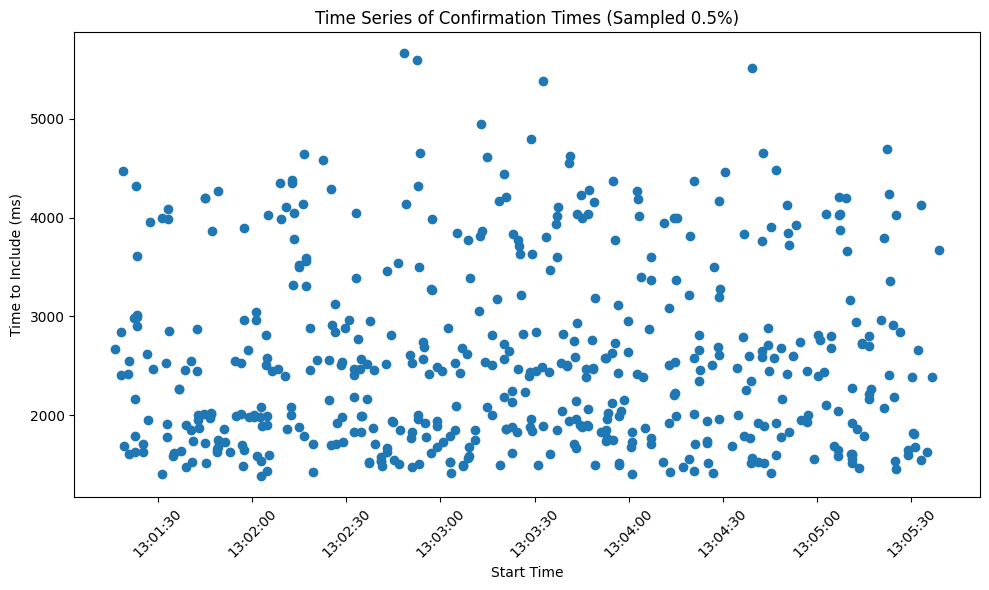

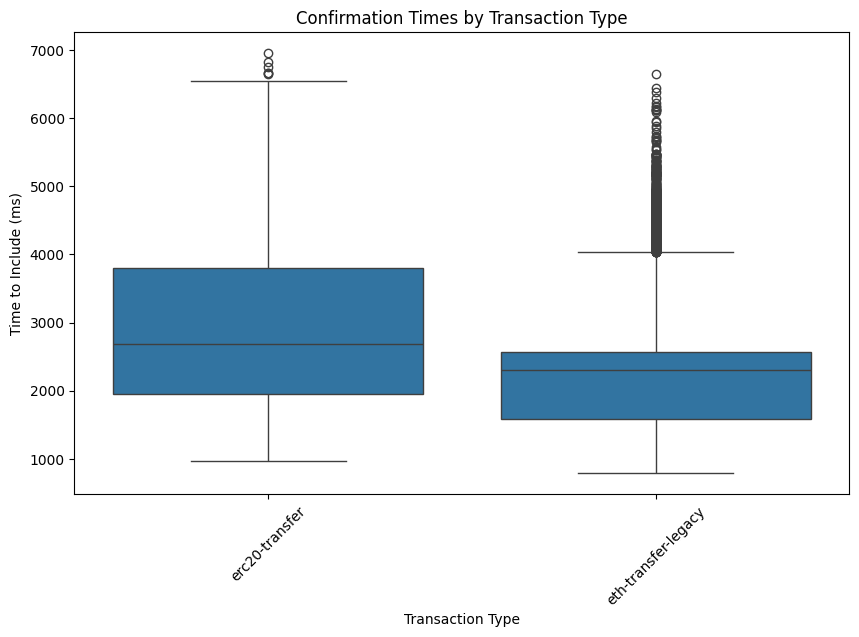

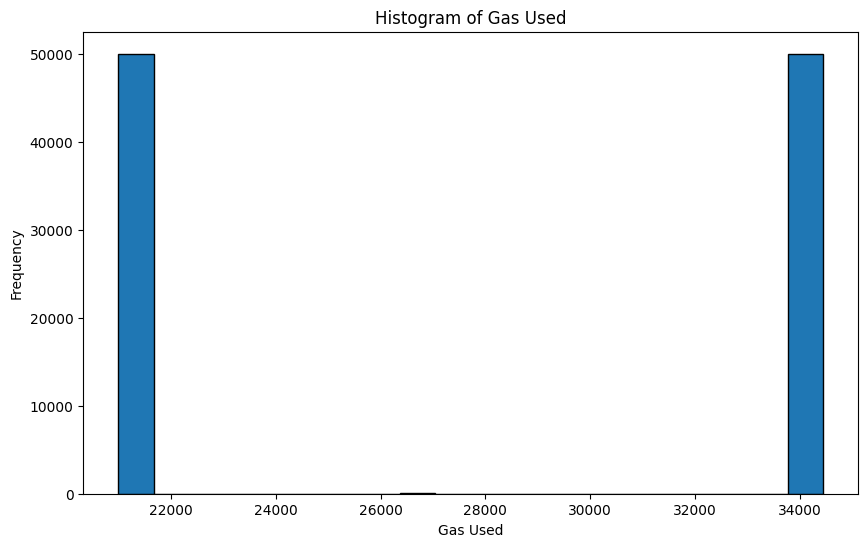

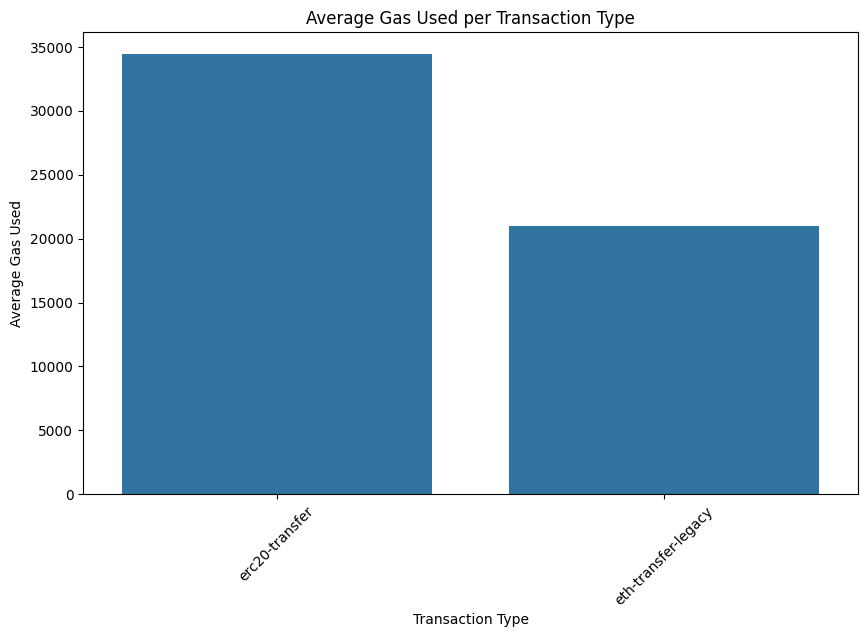

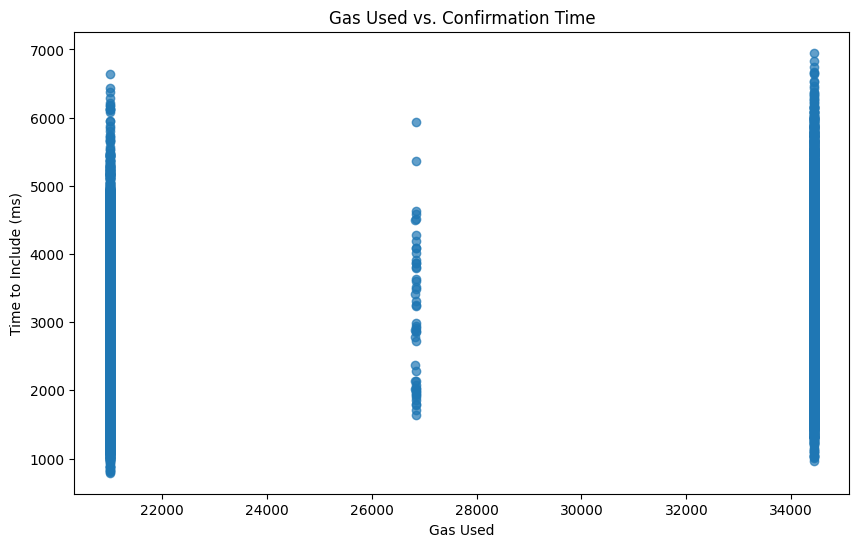

/tmp/ipykernel_1384304/1390755438.py:97: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  transaction_counts = df.resample('1T').count()['tx_hash']  # Resample per minute


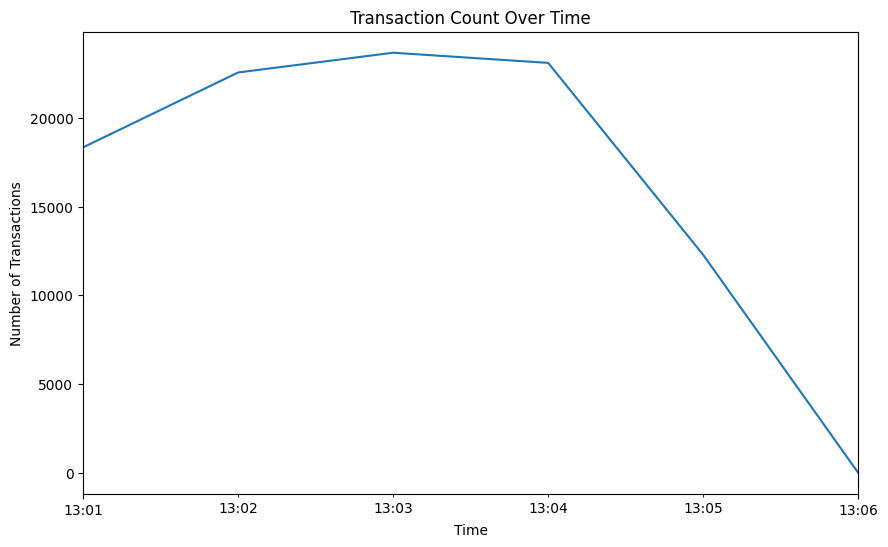

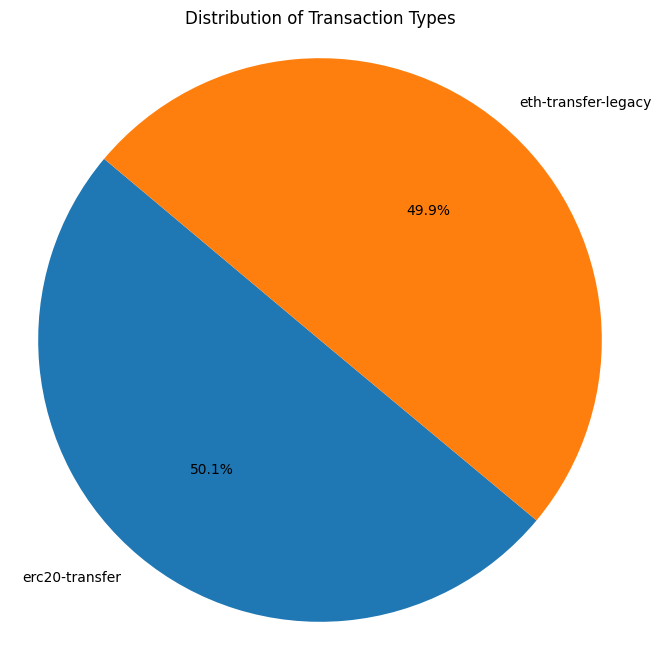

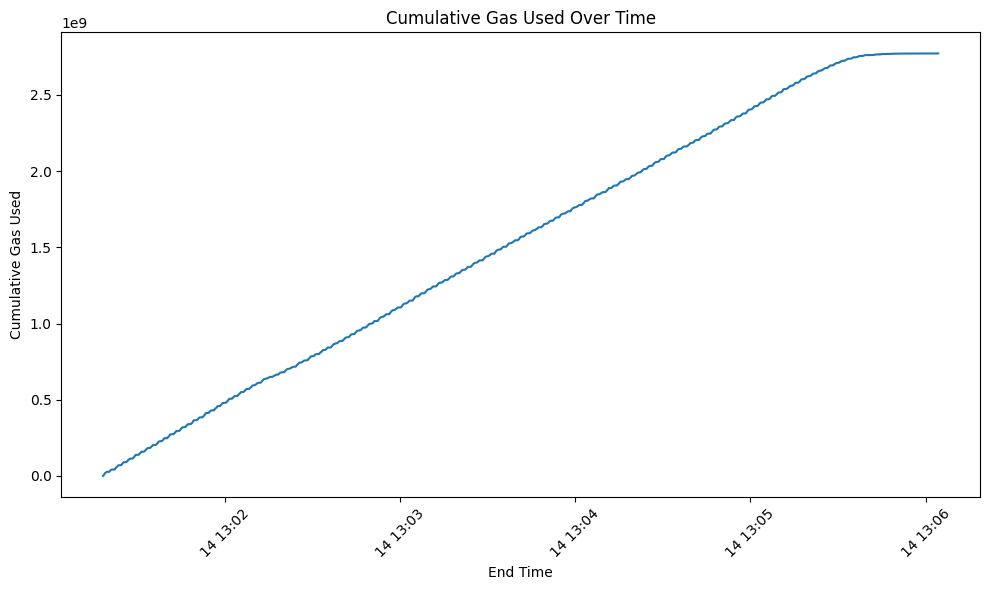

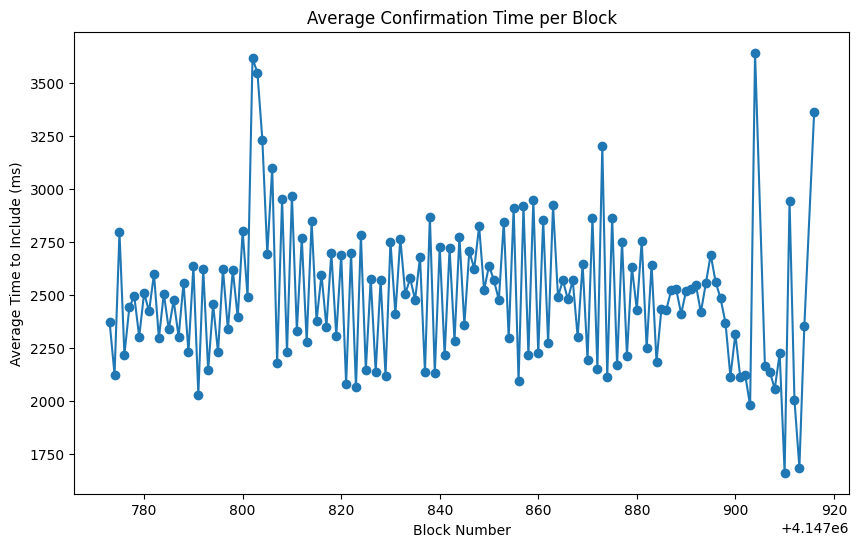

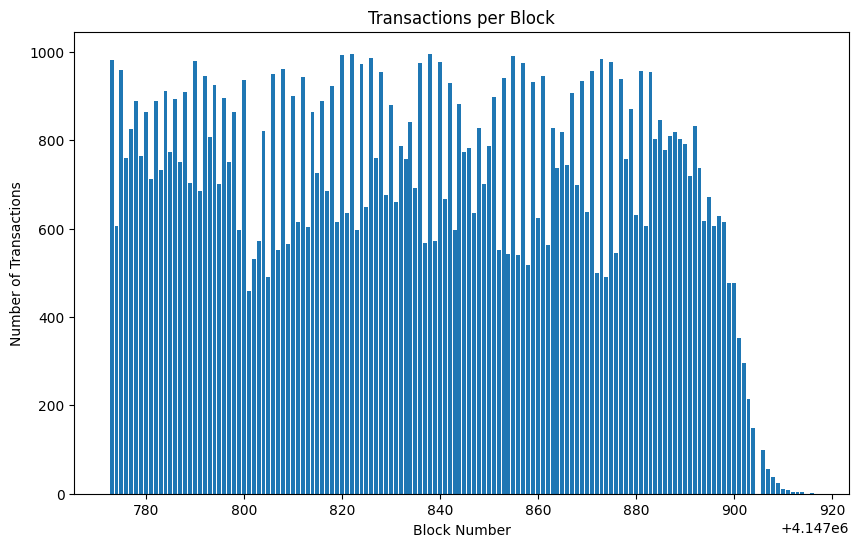

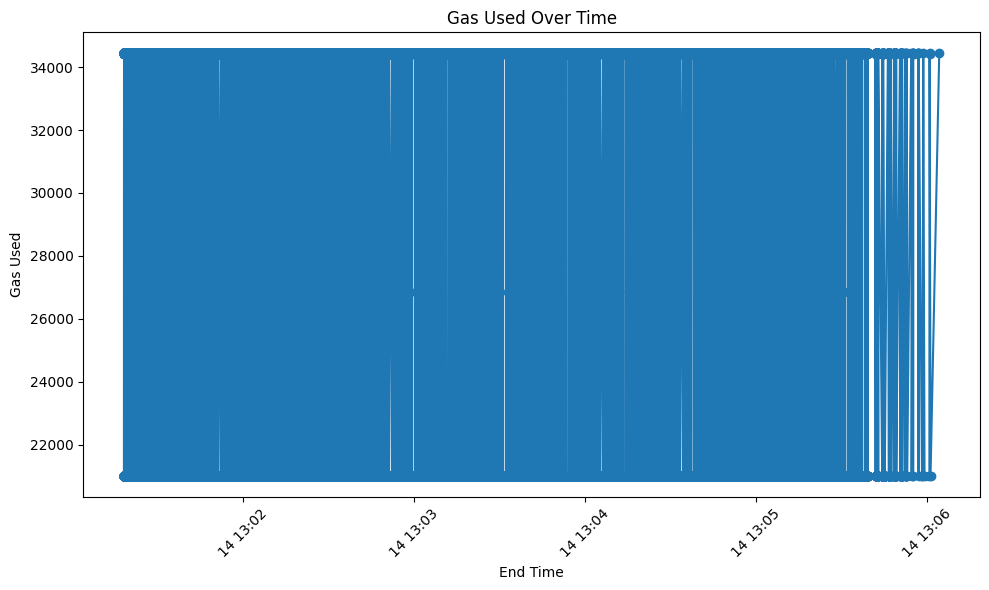

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import numpy as np

# Function to read and combine CSV files
def read_csv_files(folder_path):
    """
    Reads all CSV files in the specified folder and concatenates them into a single DataFrame.
    """
    dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Specify the folder containing your CSV files
folder_path = 'data-eth-erc20'  # Replace with your folder path

# Read and combine CSV files into a DataFrame
df = read_csv_files(folder_path)

# Data Preprocessing
# Convert time columns from milliseconds to datetime
df['start_time'] = pd.to_datetime(df['start_time'], unit='ms')
df['end_time'] = pd.to_datetime(df['end_time'], unit='ms')

# Calculate 'time_to_include' in milliseconds if not already accurate
df['time_to_include'] = (df['end_time'] - df['start_time']).dt.total_seconds() * 1000  # in milliseconds

# Sample 0.5% of the DataFrame for plotting if needed
sampled_df = df.sample(frac=0.005, random_state=42)

# 1. Histogram of Transaction Confirmation Times (Time to Include)
plt.figure(figsize=(10, 6))
plt.hist(df['time_to_include'], bins=20, edgecolor='k')
plt.title('Histogram of Transaction Confirmation Times')
plt.xlabel('Time to Include (ms)')
plt.ylabel('Frequency')
plt.show()

# 2. Time Series of Confirmation Times (Sampled Data)
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['start_time'], sampled_df['time_to_include'], marker='o')
plt.title('Time Series of Confirmation Times (Sampled 0.5%)')
plt.xlabel('Start Time')
plt.ylabel('Time to Include (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Box Plot of Confirmation Times by Transaction Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='kind', y='time_to_include', data=df)
plt.title('Confirmation Times by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Time to Include (ms)')
plt.xticks(rotation=45)
plt.show()

# 4. Histogram of Gas Used
plt.figure(figsize=(10, 6))
plt.hist(df['gas_used'], bins=20, edgecolor='k')
plt.title('Histogram of Gas Used')
plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.show()

# 5. Bar Chart of Average Gas Used per Transaction Type
avg_gas = df.groupby('kind')['gas_used'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='kind', y='gas_used', data=avg_gas)
plt.title('Average Gas Used per Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Gas Used')
plt.xticks(rotation=45)
plt.show()

# 6. Scatter Plot of Gas Used vs. Confirmation Time
plt.figure(figsize=(10, 6))
plt.scatter(df['gas_used'], df['time_to_include'], alpha=0.7)
plt.title('Gas Used vs. Confirmation Time')
plt.xlabel('Gas Used')
plt.ylabel('Time to Include (ms)')
plt.show()

# 7. Transaction Count Over Time
df.set_index('start_time', inplace=True)
transaction_counts = df.resample('1T').count()['tx_hash']  # Resample per minute
plt.figure(figsize=(10, 6))
transaction_counts.plot()
plt.title('Transaction Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()
df.reset_index(inplace=True)

# 8. Pie Chart of Transaction Types
type_counts = df['kind'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Types')
plt.axis('equal')
plt.show()

# 10. Cumulative Gas Used Over Time
df.sort_values('end_time', inplace=True)
df['cumulative_gas'] = df['gas_used'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df['end_time'], df['cumulative_gas'])
plt.title('Cumulative Gas Used Over Time')
plt.xlabel('End Time')
plt.ylabel('Cumulative Gas Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Average Confirmation Time per Block
avg_time_per_block = df.groupby('block_number')['time_to_include'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_time_per_block['block_number'], avg_time_per_block['time_to_include'], marker='o')
plt.title('Average Confirmation Time per Block')
plt.xlabel('Block Number')
plt.ylabel('Average Time to Include (ms)')
plt.show()

# 12. Distribution of Transactions per Block
transactions_per_block = df['block_number'].value_counts().reset_index()
transactions_per_block.columns = ['block_number', 'transaction_count']
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_block['block_number'], transactions_per_block['transaction_count'])
plt.title('Transactions per Block')
plt.xlabel('Block Number')
plt.ylabel('Number of Transactions')
plt.show()

# 13. Line Chart of Gas Used Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['end_time'], df['gas_used'], marker='o')
plt.title('Gas Used Over Time')
plt.xlabel('End Time')
plt.ylabel('Gas Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
